# first week assignment 

## 26 farv 

In [99]:
import pandas as pd
import numpy as np

data = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
#######################

In [100]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(data, names = headers)
df.head(10)#or tail

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [101]:
path = r'C:\Users\Asus\PycharmProjects\new_car_label.csv'
df.to_csv(path)

# second week assignment

## 2 ordi

In [102]:
df.dtypes
df.describe()
df.describe(include="all")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [103]:
df.replace("?", np.nan, inplace = True)

missing_data = df.isnull() # or notnull for not missings

In [104]:
for column in(missing_data.columns.values.tolist()):
   print("***",missing_data[column].value_counts() )

*** False    205
Name: symboling, dtype: int64
*** False    164
True      41
Name: normalized-losses, dtype: int64
*** False    205
Name: make, dtype: int64
*** False    205
Name: fuel-type, dtype: int64
*** False    205
Name: aspiration, dtype: int64
*** False    203
True       2
Name: num-of-doors, dtype: int64
*** False    205
Name: body-style, dtype: int64
*** False    205
Name: drive-wheels, dtype: int64
*** False    205
Name: engine-location, dtype: int64
*** False    205
Name: wheel-base, dtype: int64
*** False    205
Name: length, dtype: int64
*** False    205
Name: width, dtype: int64
*** False    205
Name: height, dtype: int64
*** False    205
Name: curb-weight, dtype: int64
*** False    205
Name: engine-type, dtype: int64
*** False    205
Name: num-of-cylinders, dtype: int64
*** False    205
Name: engine-size, dtype: int64
*** False    205
Name: fuel-system, dtype: int64
*** False    201
True       4
Name: bore, dtype: int64
*** False    201
True       4
Name: stroke, dtype:

### Replace some values in place of missing data :

In [105]:
df.dropna(subset= ["price"],axis = 0 ,inplace = True )#remove whole row with price = NaN
df["num-of-doors"].replace("NaN" , "four", inplace = True)# replace column = num of doors with four


In [106]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis=0)
print("Average of stroke:", avg_stroke)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)


Average horsepower: 103.39698492462311
Average peak rpm: 5117.587939698493
Average of normalized-losses: 122.0
Average of bore: 3.330710659898477
Average of stroke: 3.256903553299492


### standardize data format

In [107]:
df.dtypes
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


In [108]:
df['city-L/100km'] = 235/df["city-mpg"]
#for change units

In [109]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

Text(0.5, 1.0, 'horsepower bins')

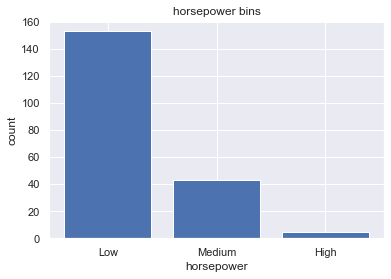

In [110]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df["horsepower"]=df["horsepower"].astype(int, copy=True)

plt.pyplot.hist(df['horsepower'])

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)
df["horsepower-binned"].value_counts()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

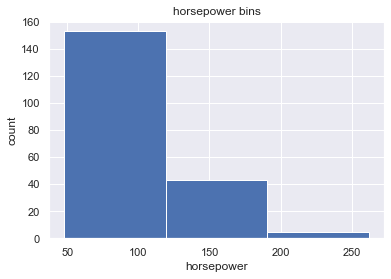

In [111]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [112]:
dummy_variable_1 = pd.get_dummies(df["aspiration"])
dummy_variable_1.rename(columns={'aspiration-default':'std', 'aspiration-zero':'0'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("aspiration", axis = 1, inplace=True)


In [113]:
df.to_csv('clean_df.csv')

## 24 & 25 ordi

 ### week 3


In [114]:
df.describe()
df.head(10)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,std,turbo
0,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,13495.0,11.190476,Low,1,0
1,3,122,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,27,16500.0,11.190476,Low,1,0
2,1,122,alfa-romero,gas,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,26,16500.0,12.368421,Medium,1,0
3,2,164,audi,gas,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,30,13950.0,9.791667,Low,1,0
4,2,164,audi,gas,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,22,17450.0,13.055556,Low,1,0
5,2,122,audi,gas,two,sedan,fwd,front,99.8,0.851994,...,8.5,110,5500.0,19,25,15250.0,12.368421,Low,1,0
6,1,158,audi,gas,four,sedan,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,25,17710.0,12.368421,Low,1,0
7,1,122,audi,gas,four,wagon,fwd,front,105.8,0.925997,...,8.5,110,5500.0,19,25,18920.0,12.368421,Low,1,0
8,1,158,audi,gas,four,sedan,fwd,front,105.8,0.925997,...,8.3,140,5500.0,17,20,23875.0,13.823529,Medium,0,1
10,2,192,bmw,gas,two,sedan,rwd,front,101.2,0.849592,...,8.8,101,5800.0,23,29,16430.0,10.217391,Low,1,0


In [115]:
counts = df["symboling"].value_counts()
counts

 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [116]:
counts.index.name = 'drive_wheels'


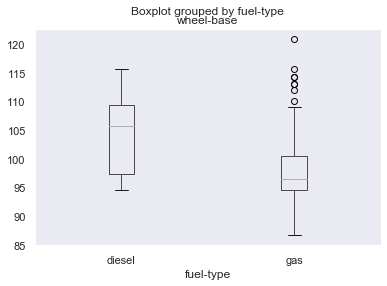

In [117]:
df.boxplot(by = 'fuel-type' , column = ['wheel-base'],grid = False)

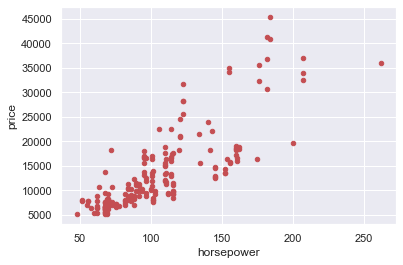

In [118]:
ax1 = df.plot.scatter(x='horsepower', y='price', c='r')

In [119]:
df.groupby(['price']).mean()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,std,turbo
price,,,,,,,,,,,,,,,,,,
5118.0,2.0,83.0,93.7,0.753964,0.880556,0.897993,2050.0,97.0,3.62,2.36,9.0,69.0,4900.0,31.0,36.0,7.580645,1.0,0.0
5151.0,2.0,121.0,88.4,0.678039,0.837500,0.889632,1488.0,61.0,2.91,3.03,9.5,48.0,5100.0,47.0,53.0,5.000000,1.0,0.0
5195.0,1.0,104.0,93.1,0.764536,0.891667,0.904682,1890.0,91.0,3.03,3.15,9.0,68.0,5000.0,30.0,31.0,7.833333,1.0,0.0
5348.0,1.0,87.0,95.7,0.762614,0.883333,0.911371,1985.0,92.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0,6.714286,1.0,0.0
5389.0,2.0,161.0,93.7,0.755887,0.894444,0.849498,1918.0,92.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0,6.351351,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36880.0,0.0,122.0,110.0,0.946660,0.984722,0.941472,3505.0,209.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0,15.666667,1.0,0.0
37028.0,3.0,122.0,89.5,0.811629,0.902778,0.862876,2800.0,194.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0,13.823529,1.0,0.0
40960.0,0.0,122.0,120.9,1.000000,0.995833,0.948161,3900.0,308.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0,16.785714,1.0,0.0


In [120]:
#df_pivot = df.pivot(index='make',columns='bore')['price']  

In [121]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

In [122]:
#plt.pcolor(df_pivot, cmap = 'RdBu')
#plt.colorbar()
#plt.show()

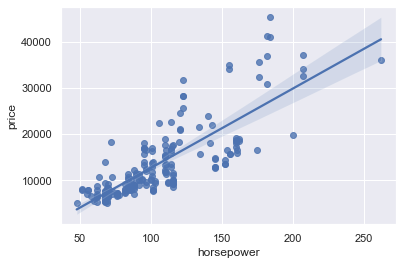

In [134]:
sns.regplot(x = df.horsepower, y = df.price)
#plt.ylim(0,)

In [145]:
grouping_data = df.groupby(['make', 'body-style','price']) 
grouping_data.first()


symboling  normalized-losses fuel-type  \
make        body-style  price                                             
alfa-romero convertible 13495.0          3                122       gas   
                        16500.0          3                122       gas   
            hatchback   16500.0          1                122       gas   
audi        sedan       13950.0          2                164       gas   
                        15250.0          2                122       gas   
...                                    ...                ...       ...   
volvo       sedan       22470.0         -1                 95    diesel   
                        22625.0         -1                 95       gas   
            wagon       13415.0         -1                 74       gas   
                        16515.0         -1                 74       gas   
                        18950.0         -1                 74       gas   

                                num-of-doors drive-wheels engine-location  \
make        body-style  price                                               
alfa-romero convertible 13495.0          two          rwd           front   
                        16500.0          two          rwd           front   
            hatchback   16500.0          two          rwd           front   
audi        sedan       13950.0         four          fwd           front   
                        15250.0          two          fwd           front   
...                                      ...          ...             ...   
volvo       sedan       22470.0         four          rwd           front   
                        22625.0         four          rwd           front   
            wagon       13415.0         four          rwd           front   
                        16515.0         four          rwd           front   
                        18950.0         four          rwd           front   

                                 wheel-base    length     width    height  \
make        body-style  price                                               
alfa-romero convertible 13495.0        88.6  0.811148  0.890278  0.816054   
                        16500.0        88.6  0.811148  0.890278  0.816054   
            hatchback   16500.0        94.5  0.822681  0.909722  0.876254   
audi        sedan       13950.0        99.8  0.848630  0.919444  0.908027   
                        15250.0        99.8  0.851994  0.920833  0.887960   
...                                     ...       ...       ...       ...   
volvo       sedan       22470.0       109.1  0.907256  0.956944  0.928094   
                        22625.0       109.1  0.907256  0.956944  0.928094   
            wagon       13415.0       104.3  0.907256  0.933333  0.961538   
                        16515.0       104.3  0.907256  0.933333  0.961538   
                        18950.0       104.3  0.907256  0.933333  0.961538   

                                 ...  stroke compression-ratio horsepower  \
make        body-style  price    ...                                        
alfa-romero convertible 13495.0  ...    2.68               9.0        111   
                        16500.0  ...    2.68               9.0        111   
            hatchback   16500.0  ...    3.47               9.0        154   
audi        sedan       13950.0  ...    3.40              10.0        102   
                        15250.0  ...    3.40               8.5        110   
...                              ...     ...               ...        ...   
volvo       sedan       22470.0  ...    3.40              23.0        106   
                        22625.0  ...    3.15               9.5        114   
            wagon       13415.0  ...    3.15               9.5        114   
                        16515.0  ...    3.15               9.5        114   
                        18950.0  ...    3.15               7.5        162   

                                 peak-rpm city-mpg 

### week 4

In [146]:
from sklearn import linear_model

In [166]:
X = df[['stroke', 'city-L/100km', 'horsepower', 'peak-rpm']]
y = df['price']
regr = linear_model.LinearRegression()
regr.fit(X, y)
yhat = regr.predict(X)#example of X values for predict
print(yhat)
regr.intercept_
regr.coef_

[15716.70522843 15716.70522843 21868.44771444 11651.61020814
 16699.64060317 15388.72945742 15388.72945742 15388.72945742
 20293.38501975 10930.28779854 10930.28779854 19361.79554685
 19361.79554685 19982.79688051 26184.86874956 26184.86874956
 27271.62108347  1666.29717716  4420.07138787  4420.07138787
  4077.20282239  5441.5649504  11649.97500475  5441.5649504
  5441.5649504   5441.5649504  11649.97500475 11769.66928565
 20951.86118818  3584.5413533   4704.81723956  2988.28950469
  4985.26945476  4985.26945476  4985.26945476  4985.26945476
  7732.99626829  7732.99626829  7732.99626829  7732.99626829
 10585.33264845 11027.03176406 11292.87417297 11951.3707792
 28877.68730912 28877.68730912 39930.87364803  7352.36159674
  7071.90938154  7071.90938154  7071.90938154  7071.90938154
 14349.99193594 14349.99193594 14349.99193594 19037.18097113
 11141.00760825 11141.00760825 11141.00760825 11141.00760825
  6654.37926391 11141.00760825 18089.46649222 10220.13838423
 18761.45899251 18761.4589

array([ 163.5203393 , 1109.87472399,  109.6555858 ,   -3.28685212])

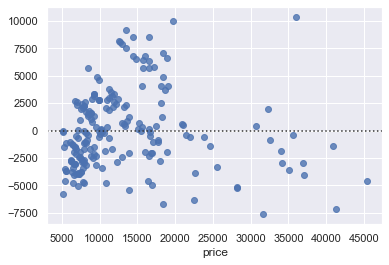

In [167]:
sns.residplot(y,yhat)

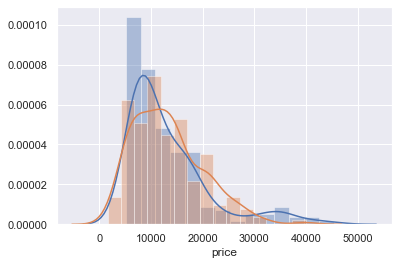

In [173]:
sns.distplot(y)

sns.distplot(yhat)

In [180]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [181]:
mean_squared_error(y, yhat)

17740138.623738423

In [182]:
r2_score(y, yhat)

0.7177009648059647

In [188]:
scores = cross_val_score(regr,X,y,cv = 10)
np.mean(scores)

-0.1974237471904346

# END